<a href="https://colab.research.google.com/github/MilanDouglas/datasets/blob/master/Learning_Pandas_TitanicDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [10]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
import pandas as pd

df = pd.read_csv('titanic.csv') # Update the file path
print(df.head())

--2024-07-18 14:16:16--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2024-07-18 14:16:16 (4.41 MB/s) - ‘titanic.csv’ saved [60302/60302]

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Brigg

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This kind of raw numerical data is useful, but it is often difficult to present visually to audiences. For this reason, it is quite common to have the raw numerical data available, but to give the audience a quick sense of the numbers visually. We can take that initial code we see above and append two other methods to it .plot.bar() and we get the following result.



In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

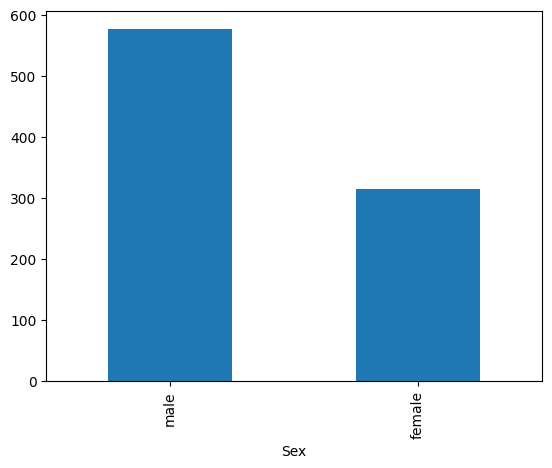

In [14]:
df['Sex'].value_counts().plot.bar()

<Axes: title={'center': 'Passengers on the Titanic'}, xlabel='Sex'>

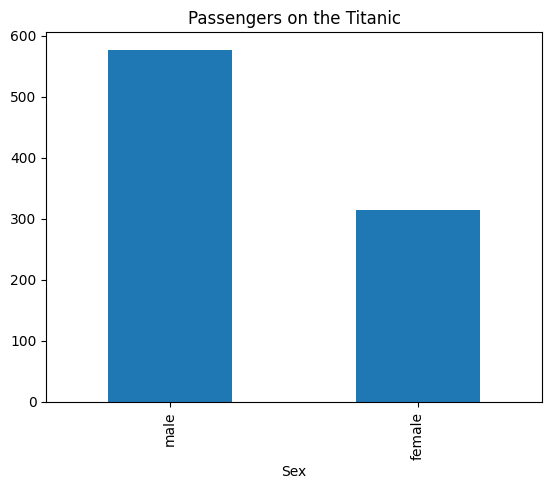

In [16]:
df['Sex'].value_counts().plot.bar(title="Passengers on the Titanic")

<Axes: title={'center': 'Passengers on the Titanic'}, xlabel='Sex'>

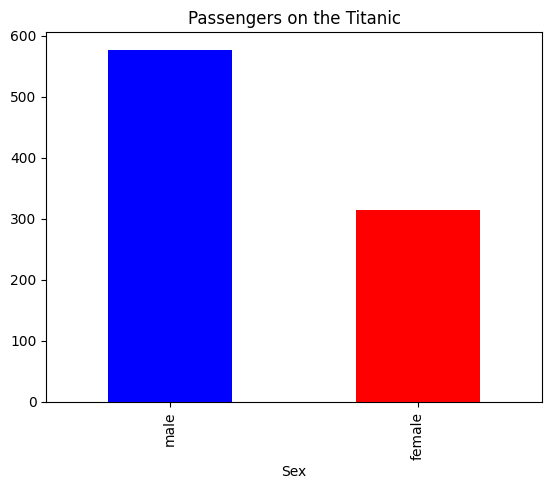

In [17]:
df['Sex'].value_counts().plot.bar(title="Passengers on the Titanic", color=["blue", "red"])

<Axes: title={'center': 'Passengers on the Titanic'}, ylabel='Sex'>

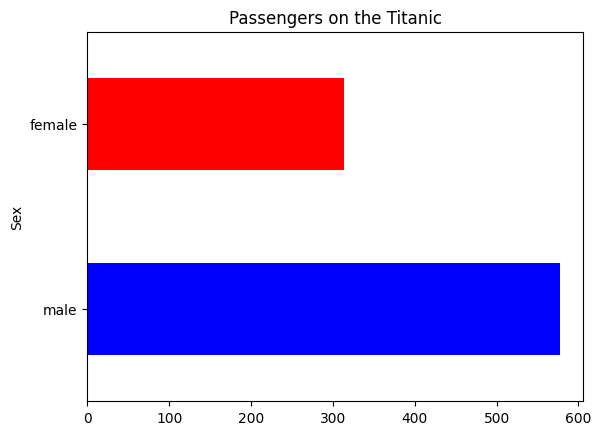

In [18]:
df['Sex'].value_counts().plot.barh(title="Passengers on the Titanic", color=["blue", "red"])

**Pie Charts with Pandas**

<Axes: ylabel='count'>

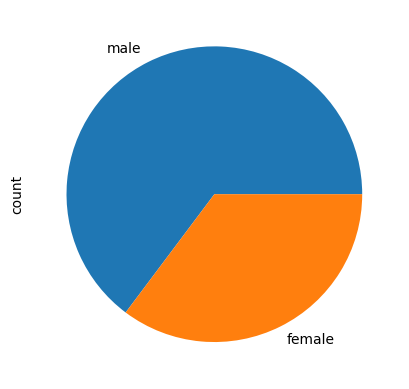

In [19]:
df['Sex'].value_counts().plot.pie()

<Axes: ylabel='count'>

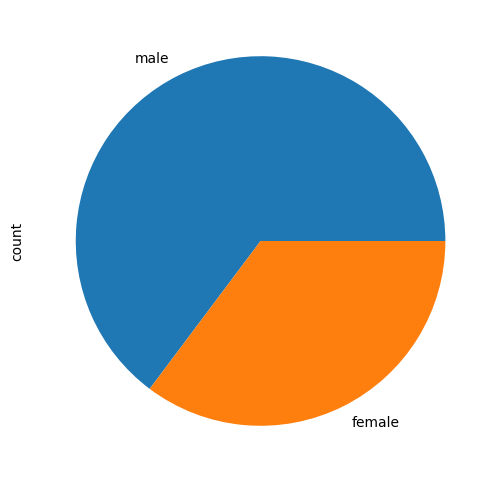

In [20]:
df['Sex'].value_counts().plot.pie(figsize=(6, 6))

<Axes: title={'center': 'Sex'}, ylabel='count'>

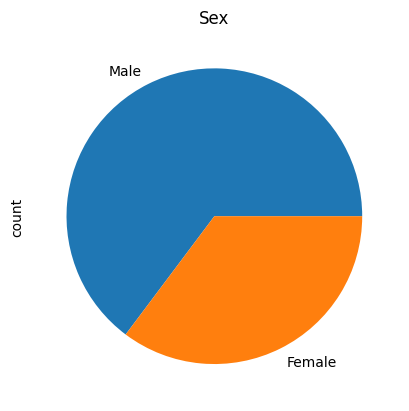

In [22]:
df['Sex'].value_counts().plot.pie(labels=["Male", "Female"], title="Sex")

To allow them to easily see the percentage of each gender, not just visually, but quantitatively. To do this, we can pass the keyword argument, autopct, which will take a string. In this case, we can pass in the argument “%.2f” which is a formatted string. This argument will convert our data into a percentage.

<Axes: title={'center': 'Sex'}, ylabel='count'>

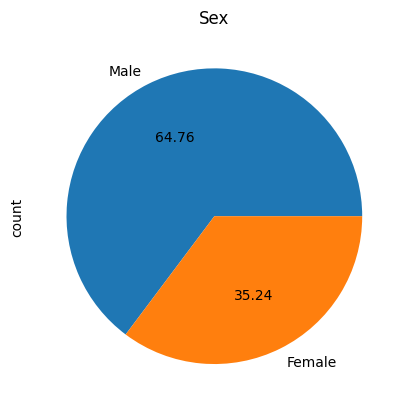

In [23]:
df['Sex'].value_counts().plot.pie(labels=["Male", "Female"], title="Sex", autopct="%.2f")

**Scatter Plots with Pandas**

<Axes: xlabel='Age', ylabel='Fare'>

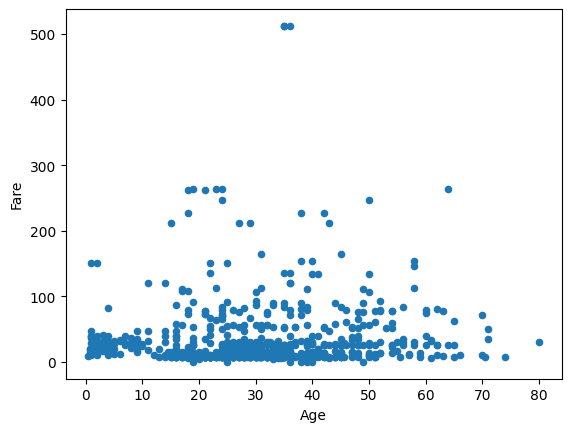

In [24]:
df.plot.scatter(x="Age", y="Fare")

Let’s try to color coordinate this data. Let’s say we are interested in seeing not only the passenger’s age and fare, but we’re also interested in color-coordinating the graph so that their Pclass effects the color of each plot. We can do this by passing a few new keyword arguments.

c=”Pclass” => c will be the column that affects the color

cmap=”virdis” => will be the color map we want to use (these are built into Pandas)

<Axes: xlabel='Age', ylabel='Fare'>

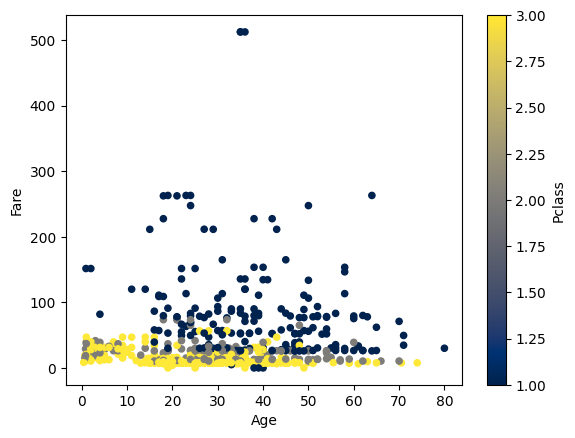

In [26]:
df.plot.scatter(x="Age", y="Fare", c="Pclass", cmap="cividis")

 When we pass a DataFrame column to c as a set of numbers, Pandas presumes that that number corresponds to a gradient change in color. But passenger class is not a gradient change, it is a integral change, meaning no one will be Pclass 1.2. They will be 1, 2, or 3. In order to fix this graph, we can make a few changes. First, we can use df.loc that we met in a previous notebook to grab all classes. Now, we know there are three. We can convert these from numerical representations of the class into string representations, e.g. First, Second, and Third.

In [27]:
df.loc[(df.Pclass == 1),'Pclass']="First"
df.loc[(df.Pclass == 2),'Pclass']="Second"
df.loc[(df.Pclass == 3),'Pclass']="Third"

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,First,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,Third,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,First,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Age', ylabel='Fare'>

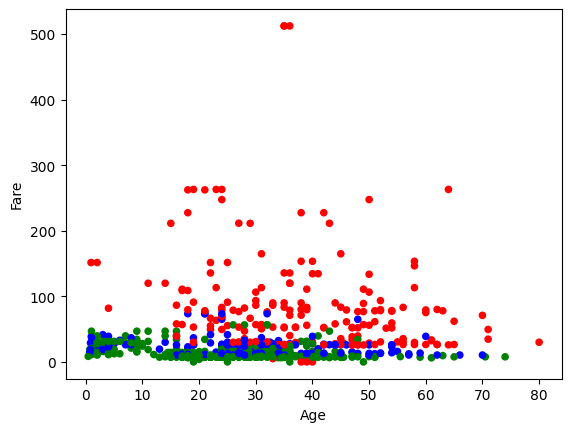

In [31]:
df.loc[(df.Pclass == "First"),'Pclass']="red"
df.loc[(df.Pclass == "Second"),'Pclass']="blue"
df.loc[(df.Pclass == "Third"),'Pclass']="green"
df.plot.scatter(x="Age", y="Fare", c="Pclass")


<Axes: xlabel='Age', ylabel='Fare'>

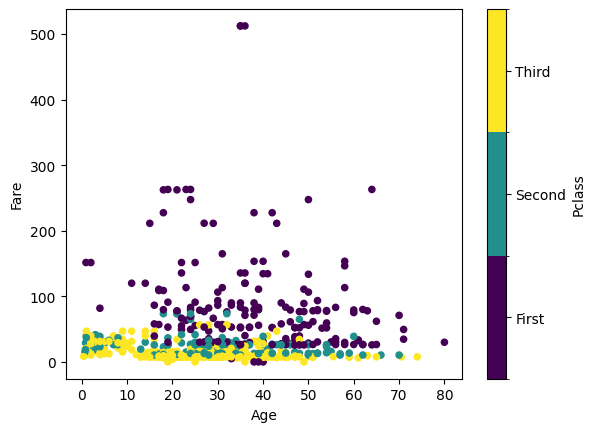

In [32]:
df.loc[(df.Pclass == "red"),'Pclass']="First"
df.loc[(df.Pclass == "blue"),'Pclass']="Second"
df.loc[(df.Pclass == "green"),'Pclass']="Third"

df['Pclass'] = df.Pclass.astype('category')
df.plot.scatter(x="Age", y="Fare", c="Pclass", cmap="viridis")


<Axes: xlabel='Age', ylabel='Fare'>

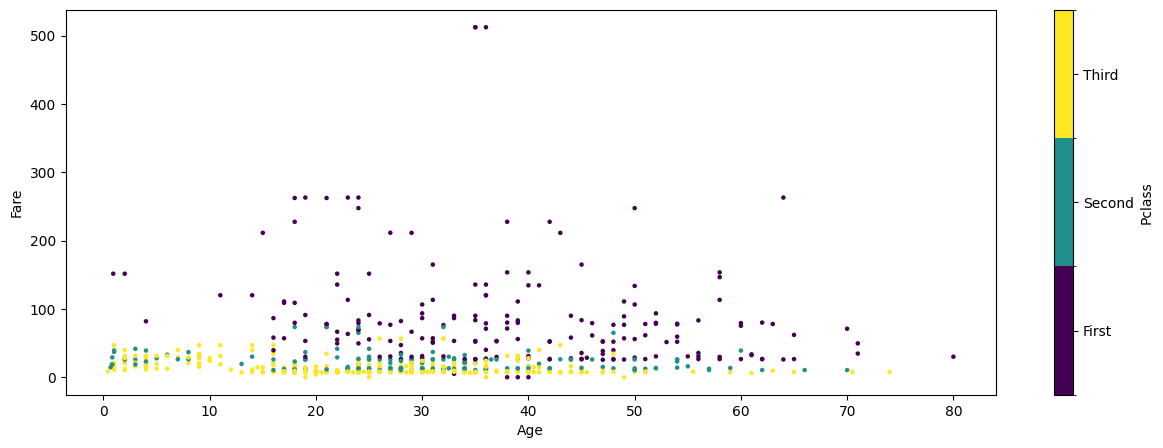

In [33]:
df.plot.scatter(x="Age", y="Fare", c="Pclass", cmap="viridis", s=5, figsize=(15, 5))